In [1]:
import pandas as pd
import os 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date,datetime
from dateutil.relativedelta import relativedelta as rd
from functools import reduce
%matplotlib inline

In [2]:
ruta = '/home/jose/data/chicago/'

In [3]:
lst_arch = [x for x in os.listdir(ruta) if x[:3]=='chi']

In [4]:
%%time
lst_df = []
for i,arch in enumerate(lst_arch):
    print (arch)
    df = pd.read_csv(os.path.join(ruta,arch))[['taxi_id']]
    lst_df.append(df)
df = pd.concat(lst_df,ignore_index=True)

chicago_taxi_trips_2016_01.csv
chicago_taxi_trips_2016_02.csv
chicago_taxi_trips_2016_03.csv
chicago_taxi_trips_2016_04.csv
chicago_taxi_trips_2016_05.csv
chicago_taxi_trips_2016_06.csv
chicago_taxi_trips_2016_07.csv
chicago_taxi_trips_2016_08.csv
chicago_taxi_trips_2016_09.csv
chicago_taxi_trips_2016_10.csv
chicago_taxi_trips_2016_11.csv
chicago_taxi_trips_2016_12.csv
CPU times: user 36.8 s, sys: 2.34 s, total: 39.2 s
Wall time: 40 s


In [5]:
aux = pd.DataFrame(df.taxi_id.value_counts()).sort_values('taxi_id',ascending=False)

In [6]:
aux.describe()

,taxi_id
count,7666.000000
mean,2591.080616
std,2515.162152
min,1.000000
25%,54.000000
50%,2030.500000
75%,4452.000000
max,12379.000000


In [7]:
aux.shape

(7666, 1)

In [8]:
aux2 = aux.sample(n=1000)

In [9]:
aux2.shape

(1000, 1)

In [10]:
aux2.describe()

,taxi_id
count,1000.000000
mean,2603.519000
std,2487.083932
min,1.000000
25%,67.500000
50%,2138.500000
75%,4401.500000
max,12348.000000


In [11]:
aux2= aux2.reset_index().drop('taxi_id',axis=1)

In [12]:
aux2.rename(columns={'index':'taxi_id'},inplace=True)

In [13]:
aux2.head()

,taxi_id
0,8230.0
1,7544.0
2,7211.0
3,8602.0
4,4100.0


In [14]:
%%time
lst_df = []
for i,arch in enumerate(lst_arch):
    print (arch)
    df = pd.read_csv(os.path.join(ruta,arch))
    df = df.merge(aux2,on='taxi_id',how='inner')
    lst_df.append(df)
df = pd.concat(lst_df,ignore_index=True)

chicago_taxi_trips_2016_01.csv
chicago_taxi_trips_2016_02.csv
chicago_taxi_trips_2016_03.csv
chicago_taxi_trips_2016_04.csv
chicago_taxi_trips_2016_05.csv
chicago_taxi_trips_2016_06.csv
chicago_taxi_trips_2016_07.csv
chicago_taxi_trips_2016_08.csv
chicago_taxi_trips_2016_09.csv
chicago_taxi_trips_2016_10.csv
chicago_taxi_trips_2016_11.csv
chicago_taxi_trips_2016_12.csv
CPU times: user 32.7 s, sys: 1.45 s, total: 34.1 s
Wall time: 34.1 s


In [15]:
df.shape

(2603519, 20)

In [16]:
df.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,221.0,2016-1-3 16:30:00,2016-1-3 16:30:00,720.0,0.0,NaN,807.0,7.0,28.0,10.75,0.0,0.0,0.0,10.75,Cash,101.0,642.0,32.0,411.0,545.0
1,221.0,2016-1-8 03:30:00,2016-1-8 03:45:00,660.0,3.0,NaN,NaN,7.0,21.0,11.00,0.0,0.0,1.0,12.00,Cash,101.0,173.0,203.0,95.0,781.0
2,221.0,2016-1-24 02:30:00,2016-1-24 02:45:00,720.0,2.6,NaN,512.0,6.0,7.0,10.00,2.0,0.0,0.0,12.00,Credit Card,101.0,272.0,371.0,642.0,32.0
3,221.0,2016-1-23 00:00:00,2016-1-23 00:00:00,180.0,1.1,NaN,2.0,7.0,7.0,6.00,0.0,0.0,0.0,6.00,Cash,101.0,725.0,518.0,197.0,467.0
4,221.0,2016-1-9 02:30:00,2016-1-9 02:30:00,240.0,0.5,NaN,225.0,8.0,8.0,5.25,0.0,0.0,0.0,5.25,Cash,101.0,210.0,470.0,754.0,410.0


In [17]:
%%time
df.payment_type.value_counts(normalize=True)

CPU times: user 216 ms, sys: 990 µs, total: 217 ms
Wall time: 216 ms


Cash           0.519933
Credit Card    0.471395
No Charge      0.005145
Unknown        0.002414
Dispute        0.000572
Pcard          0.000316
Prcard         0.000225
Name: payment_type, dtype: float64

In [18]:
df['payment_type'] = df['payment_type'].map(lambda x:x if x=='Credit Card' else 'Cash') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcce618aeb8>]],
      dtype=object)

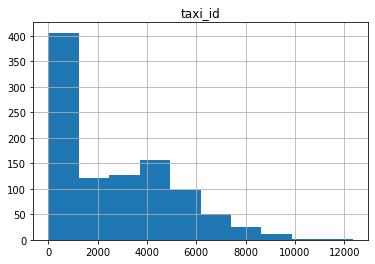

In [19]:
aux = pd.DataFrame(df.taxi_id.value_counts())
aux.hist()

In [20]:
aux.describe(percentiles=np.arange(0,1,0.01))

,taxi_id
count,1000.000000
mean,2603.519000
std,2487.083932
min,1.000000
0%,1.000000
1%,1.000000
2%,1.000000
3%,1.000000
4%,1.000000
5%,1.000000


In [21]:
aux = aux[(aux.taxi_id>=1200)&(aux.taxi_id<=9000)]

In [22]:
aux= aux.reset_index().drop('taxi_id',axis=1)

In [23]:
aux.rename(columns={'index':'taxi_id'},inplace=True)

In [24]:
df = df.merge(aux,on='taxi_id',how='inner')

In [25]:
df.shape

(2402253, 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcce60d3048>]],
      dtype=object)

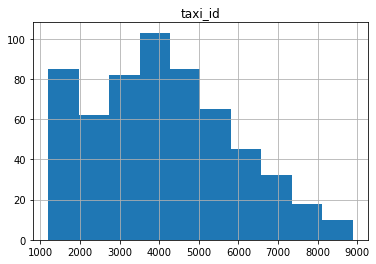

In [26]:
aux = pd.DataFrame(df.taxi_id.value_counts())
aux.hist()

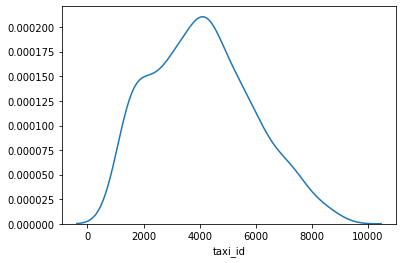

In [27]:
sns.distplot(aux.taxi_id,hist=False)

In [28]:
df.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,221.0,2016-1-3 16:30:00,2016-1-3 16:30:00,720.0,0.0,NaN,807.0,7.0,28.0,10.75,0.0,0.0,0.0,10.75,Cash,101.0,642.0,32.0,411.0,545.0
1,221.0,2016-1-8 03:30:00,2016-1-8 03:45:00,660.0,3.0,NaN,NaN,7.0,21.0,11.00,0.0,0.0,1.0,12.00,Cash,101.0,173.0,203.0,95.0,781.0
2,221.0,2016-1-24 02:30:00,2016-1-24 02:45:00,720.0,2.6,NaN,512.0,6.0,7.0,10.00,2.0,0.0,0.0,12.00,Credit Card,101.0,272.0,371.0,642.0,32.0
3,221.0,2016-1-23 00:00:00,2016-1-23 00:00:00,180.0,1.1,NaN,2.0,7.0,7.0,6.00,0.0,0.0,0.0,6.00,Cash,101.0,725.0,518.0,197.0,467.0
4,221.0,2016-1-9 02:30:00,2016-1-9 02:30:00,240.0,0.5,NaN,225.0,8.0,8.0,5.25,0.0,0.0,0.0,5.25,Cash,101.0,210.0,470.0,754.0,410.0


In [29]:
df['mes'] = pd.to_datetime(df['trip_start_timestamp']).dt.date.map(lambda x:x.strftime('%Y%m'))

In [30]:
df.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,...,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,mes
0,221.0,2016-1-3 16:30:00,2016-1-3 16:30:00,720.0,0.0,NaN,807.0,7.0,28.0,10.75,...,0.0,0.0,10.75,Cash,101.0,642.0,32.0,411.0,545.0,201601
1,221.0,2016-1-8 03:30:00,2016-1-8 03:45:00,660.0,3.0,NaN,NaN,7.0,21.0,11.00,...,0.0,1.0,12.00,Cash,101.0,173.0,203.0,95.0,781.0,201601
2,221.0,2016-1-24 02:30:00,2016-1-24 02:45:00,720.0,2.6,NaN,512.0,6.0,7.0,10.00,...,0.0,0.0,12.00,Credit Card,101.0,272.0,371.0,642.0,32.0,201601
3,221.0,2016-1-23 00:00:00,2016-1-23 00:00:00,180.0,1.1,NaN,2.0,7.0,7.0,6.00,...,0.0,0.0,6.00,Cash,101.0,725.0,518.0,197.0,467.0,201601
4,221.0,2016-1-9 02:30:00,2016-1-9 02:30:00,240.0,0.5,NaN,225.0,8.0,8.0,5.25,...,0.0,0.0,5.25,Cash,101.0,210.0,470.0,754.0,410.0,201601


In [31]:
df['n'] = 1

In [32]:
aux = df[['taxi_id','mes','n']].copy()

In [33]:
aux = aux.pivot_table(index='taxi_id',columns='mes',values='n',aggfunc='count')

In [34]:
aux.fillna(0,inplace=True)
aux.head()

mes,201601,201602,201603,201604,201605,201606,201607,201608,201609,201610,201611,201612
taxi_id,,,,,,,,,,,,
62.0,374.0,438.0,551.0,493.0,163.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68.0,432.0,424.0,458.0,466.0,464.0,507.0,466.0,516.0,452.0,490.0,488.0,372.0
82.0,338.0,294.0,504.0,408.0,393.0,381.0,402.0,465.0,410.0,436.0,369.0,201.0
88.0,748.0,662.0,776.0,677.0,204.0,247.0,305.0,615.0,477.0,553.0,450.0,420.0
93.0,283.0,267.0,294.0,283.0,263.0,245.0,266.0,276.0,212.0,230.0,271.0,281.0


In [35]:
aux.describe().T

,count,mean,std,min,25%,50%,75%,max
mes,,,,,,,,
201601,587.0,348.868825,197.713849,0.0,212.0,331.0,468.5,1075.0
201602,587.0,356.993186,190.965671,0.0,229.0,338.0,470.5,1137.0
201603,587.0,404.403748,203.328377,0.0,266.0,380.0,538.5,1211.0
201604,587.0,400.136286,202.869909,0.0,257.0,382.0,524.5,1084.0
201605,587.0,399.492334,202.543194,0.0,249.5,370.0,519.0,1164.0
201606,587.0,388.444634,189.423992,0.0,252.0,365.0,509.0,1222.0
201607,587.0,354.076661,181.908425,0.0,226.0,354.0,467.0,913.0
201608,587.0,308.102215,204.106978,0.0,167.5,304.0,448.0,970.0
201609,587.0,272.390119,187.378947,0.0,140.0,272.0,397.5,887.0


In [36]:
aux['cad'] = ''
aux['activo'] = 0
for c in aux.columns:
    if c not in ['cad','activo']:
        aux['cad'] += (aux[c]>0).astype(int).astype(str)
        aux['activo'] += (aux[c]>0).astype(int)

In [37]:
aux.head()

mes,201601,201602,201603,201604,201605,201606,201607,201608,201609,201610,201611,201612,cad,activo
taxi_id,,,,,,,,,,,,,,
62.0,374.0,438.0,551.0,493.0,163.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111110000000,5
68.0,432.0,424.0,458.0,466.0,464.0,507.0,466.0,516.0,452.0,490.0,488.0,372.0,111111111111,12
82.0,338.0,294.0,504.0,408.0,393.0,381.0,402.0,465.0,410.0,436.0,369.0,201.0,111111111111,12
88.0,748.0,662.0,776.0,677.0,204.0,247.0,305.0,615.0,477.0,553.0,450.0,420.0,111111111111,12
93.0,283.0,267.0,294.0,283.0,263.0,245.0,266.0,276.0,212.0,230.0,271.0,281.0,111111111111,12


In [38]:
aux.cad.value_counts(normalize=True).cumsum()

111111111111    0.684838
111111100000    0.781942
111111110000    0.814310
111111111000    0.838160
111111111100    0.860307
111111111110    0.880750
111110000000    0.892675
001111111111    0.904600
011111111111    0.914821
111111000000    0.923339
000111111111    0.931857
000011111111    0.936968
111111111010    0.940375
110111111111    0.943782
111111101111    0.947189
111101111111    0.950596
101111111111    0.954003
111000111111    0.955707
111110111111    0.957411
110011111111    0.959114
100011111111    0.960818
000001111100    0.962521
111111010000    0.964225
000000011111    0.965928
111100011111    0.967632
111111100111    0.969336
111111100100    0.971039
111111000111    0.972743
111111011111    0.974446
111101000000    0.976150
111011111111    0.977853
111000100011    0.979557
000111111110    0.981261
011111111110    0.982964
011111111000    0.984668
000011111100    0.986371
000111111000    0.988075
011000001111    0.989779
000000000111    0.991482
111001111111    0.993186


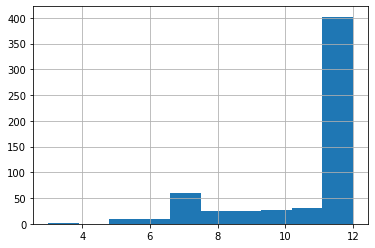

In [39]:
aux.activo.hist()

In [40]:
aux.activo.describe(percentiles=np.arange(0,.1,0.01))

count    587.000000
mean      10.833049
std        1.993864
min        3.000000
0%         3.000000
1%         5.000000
2%         6.000000
3%         6.000000
4%         7.000000
5%         7.000000
6%         7.000000
7%         7.000000
8%         7.000000
9%         7.000000
50%       12.000000
max       12.000000
Name: activo, dtype: float64

In [41]:
aux.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 587 entries, 62.0 to 8740.0
Data columns (total 14 columns):
201601    587 non-null float64
201602    587 non-null float64
201603    587 non-null float64
201604    587 non-null float64
201605    587 non-null float64
201606    587 non-null float64
201607    587 non-null float64
201608    587 non-null float64
201609    587 non-null float64
201610    587 non-null float64
201611    587 non-null float64
201612    587 non-null float64
cad       587 non-null object
activo    587 non-null int64
dtypes: float64(12), int64(1), object(1)
memory usage: 68.8+ KB


In [42]:
df.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,mes,n
0,221.0,2016-1-3 16:30:00,2016-1-3 16:30:00,720.0,0.0,NaN,807.0,7.0,28.0,10.75,...,0.0,10.75,Cash,101.0,642.0,32.0,411.0,545.0,201601,1
1,221.0,2016-1-8 03:30:00,2016-1-8 03:45:00,660.0,3.0,NaN,NaN,7.0,21.0,11.00,...,1.0,12.00,Cash,101.0,173.0,203.0,95.0,781.0,201601,1
2,221.0,2016-1-24 02:30:00,2016-1-24 02:45:00,720.0,2.6,NaN,512.0,6.0,7.0,10.00,...,0.0,12.00,Credit Card,101.0,272.0,371.0,642.0,32.0,201601,1
3,221.0,2016-1-23 00:00:00,2016-1-23 00:00:00,180.0,1.1,NaN,2.0,7.0,7.0,6.00,...,0.0,6.00,Cash,101.0,725.0,518.0,197.0,467.0,201601,1
4,221.0,2016-1-9 02:30:00,2016-1-9 02:30:00,240.0,0.5,NaN,225.0,8.0,8.0,5.25,...,0.0,5.25,Cash,101.0,210.0,470.0,754.0,410.0,201601,1


In [43]:
df = df[['taxi_id','trip_start_timestamp','trip_total','payment_type']]

In [44]:
df['trip_start_timestamp'] = pd.to_datetime(df['trip_start_timestamp']).dt.date

In [45]:
df.head()

,taxi_id,trip_start_timestamp,trip_total,payment_type
0,221.0,2016-01-03,10.75,Cash
1,221.0,2016-01-08,12.00,Cash
2,221.0,2016-01-24,12.00,Credit Card
3,221.0,2016-01-23,6.00,Cash
4,221.0,2016-01-09,5.25,Cash


In [46]:
aux =df.groupby(['taxi_id','trip_start_timestamp']).sum()

In [47]:
aux.reset_index(inplace=True)

In [48]:
aux.head(10)

,taxi_id,trip_start_timestamp,trip_total
0,62.0,2016-01-01,198.90
1,62.0,2016-01-03,172.35
2,62.0,2016-01-04,198.70
3,62.0,2016-01-05,343.90
4,62.0,2016-01-06,148.25
5,62.0,2016-01-07,255.70
6,62.0,2016-01-08,336.90
7,62.0,2016-01-09,319.25
8,62.0,2016-01-10,377.10
9,62.0,2016-01-11,169.60


In [49]:
datetime(2016,1,1)+rd(days=120)

datetime.datetime(2016, 4, 30, 0, 0)

In [50]:
%%time
l = []
fechai = date(2016,4,30)
fechaf = date(2016,12,30)
for d in  range((fechaf-fechai).days+1):
    fhi = fechai+rd(days=d)
    print (fhi,d)
    fhf = fhi+rd(days=-10)
    k = (fhi-fhf).days

    ax = aux[(aux.trip_start_timestamp<=fhi)&(aux.trip_start_timestamp>=fhf)].copy()
    lst = []
    for i in range(k):
        ax['fh_%d'%(i)] = ax.trip_start_timestamp.map(lambda x:x+rd(days=i))
        t = ax[['taxi_id','trip_start_timestamp']].merge(ax[['taxi_id','fh_%d'%i,'trip_total']],
                                 left_on=['taxi_id','trip_start_timestamp'],
                                 right_on=['taxi_id','fh_%d'%i])
        t = t[['taxi_id','trip_total','trip_start_timestamp']]
        t.rename(columns={'trip_total':'trip_total_%d'%(i+1)},inplace=True)
        lst.append(t)
    ax = reduce(lambda x,y :pd.merge(x,y,on=['taxi_id','trip_start_timestamp'],how='left'),lst)
    ax = ax.loc[ax.trip_start_timestamp==fhi]
    for j in range(1,k+1):
        ax['v_media_monto_%d'%j]=ax[['trip_total_%d'%x for x in range(1,j+1)]].mean(axis=1)
    ax.drop(['trip_total_%d'%x for x in range(1,k+1)],axis=1,inplace=True)
    l.append(ax)

2016-04-30 0
2016-05-01 1
2016-05-02 2
2016-05-03 3
2016-05-04 4
2016-05-05 5
2016-05-06 6
2016-05-07 7
2016-05-08 8
2016-05-09 9
2016-05-10 10
2016-05-11 11
2016-05-12 12
2016-05-13 13
2016-05-14 14
2016-05-15 15
2016-05-16 16
2016-05-17 17
2016-05-18 18
2016-05-19 19
2016-05-20 20
2016-05-21 21
2016-05-22 22
2016-05-23 23
2016-05-24 24
2016-05-25 25
2016-05-26 26
2016-05-27 27
2016-05-28 28
2016-05-29 29
2016-05-30 30
2016-05-31 31
2016-06-01 32
2016-06-02 33
2016-06-03 34
2016-06-04 35
2016-06-05 36
2016-06-06 37
2016-06-07 38
2016-06-08 39
2016-06-09 40
2016-06-10 41
2016-06-11 42
2016-06-12 43
2016-06-13 44
2016-06-14 45
2016-06-15 46
2016-06-16 47
2016-06-17 48
2016-06-18 49
2016-06-19 50
2016-06-20 51
2016-06-21 52
2016-06-22 53
2016-06-23 54
2016-06-24 55
2016-06-25 56
2016-06-26 57
2016-06-27 58
2016-06-28 59
2016-06-29 60
2016-06-30 61
2016-07-01 62
2016-07-02 63
2016-07-03 64
2016-07-04 65
2016-07-05 66
2016-07-06 67
2016-07-07 68
2016-07-08 69
2016-07-09 70
2016-07-10 71
20

In [51]:
ax = pd.concat(l,ignore_index=True)

In [52]:
ax.head()

,taxi_id,trip_start_timestamp,v_media_monto_1,v_media_monto_2,v_media_monto_3,v_media_monto_4,v_media_monto_5,v_media_monto_6,v_media_monto_7,v_media_monto_8,v_media_monto_9,v_media_monto_10
0,62.0,2016-04-30,426.25,420.050,400.316667,349.9750,315.9800,307.550000,309.628571,325.787500,339.850000,338.550000
1,68.0,2016-04-30,278.50,302.175,298.316667,296.7125,284.5000,264.000000,235.564286,226.400000,234.161111,242.135000
2,82.0,2016-04-30,62.25,62.250,60.000000,110.2000,179.1125,212.320000,210.525000,204.885714,221.475000,237.055556
3,88.0,2016-04-30,162.20,249.155,293.986667,320.9325,326.0760,318.296667,287.575714,268.503750,272.714444,285.753000
4,93.0,2016-04-30,274.05,300.210,323.906667,308.4050,301.2880,307.681667,307.681667,307.681667,286.367143,285.856250


In [53]:
ax.shape

(108421, 12)

In [54]:
ax['dia_sem'] = ax.trip_start_timestamp.map(lambda x:x.weekday())

In [55]:
aux['fh_y'] = aux.trip_start_timestamp.map(lambda x:x+rd(days=-1))

In [56]:
y = aux[['taxi_id','trip_start_timestamp']].merge(aux[['taxi_id','fh_y','trip_total']],
                                              left_on=['taxi_id','trip_start_timestamp'],
                                             right_on=['taxi_id','fh_y']).drop('fh_y',axis=1).rename(columns={'trip_total':'y'})

In [57]:
ax = ax.merge(y,on=['taxi_id','trip_start_timestamp'],how='inner')

In [58]:
ax.head(10)

,taxi_id,trip_start_timestamp,v_media_monto_1,v_media_monto_2,v_media_monto_3,v_media_monto_4,v_media_monto_5,v_media_monto_6,v_media_monto_7,v_media_monto_8,v_media_monto_9,v_media_monto_10,dia_sem,y
0,62.0,2016-04-30,426.25,420.050,400.316667,349.9750,315.9800,307.550000,309.628571,325.787500,339.850000,338.550000,5,488.00
1,82.0,2016-04-30,62.25,62.250,60.000000,110.2000,179.1125,212.320000,210.525000,204.885714,221.475000,237.055556,5,306.25
2,93.0,2016-04-30,274.05,300.210,323.906667,308.4050,301.2880,307.681667,307.681667,307.681667,286.367143,285.856250,5,17.50
3,97.0,2016-04-30,163.35,302.250,281.900000,311.1125,273.1200,244.441667,236.500000,242.612500,237.605556,245.040000,5,266.85
4,101.0,2016-04-30,274.65,330.860,277.256667,243.6300,207.1040,197.570000,221.938571,248.440000,230.835556,218.902000,5,385.05
5,122.0,2016-04-30,92.00,199.025,209.383333,233.8625,231.8900,218.325000,227.557143,232.162500,223.248889,225.489000,5,131.40
6,133.0,2016-04-30,284.95,308.600,272.333333,297.3750,293.2500,277.916667,257.914286,257.914286,251.908750,257.796667,5,146.65
7,137.0,2016-04-30,121.00,251.175,277.166667,297.7950,313.8040,311.288333,301.720000,313.052500,306.202222,310.947000,5,154.95
8,148.0,2016-04-30,397.13,425.705,372.686667,366.1050,373.1240,340.526667,344.777143,323.773750,337.485556,346.081000,5,378.94
9,170.0,2016-04-30,208.95,198.675,190.033333,178.7375,180.6420,178.826667,178.826667,165.822857,165.057500,165.690000,5,263.45


In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [61]:
modelo = LinearRegression()

In [63]:
X = ax[[x for x in ax.columns if x[:2]=='v_' or x == 'dia_sem']].copy()

In [65]:
y = ax['y'].copy()

In [68]:
Xt,Xv, yt,yv = train_test_split(X,y,train_size=0.7)

In [70]:
modelo.fit(Xt,yt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
print(r2_score(y_true=yt,y_pred=modelo.predict(Xt)))
print(r2_score(y_true=yv,y_pred=modelo.predict(Xv)))

0.20485100284848912
0.18882667798309172


In [73]:
print(mean_squared_error(y_true=yt,y_pred=modelo.predict(Xt)))
print(mean_squared_error(y_true=yv,y_pred=modelo.predict(Xv)))

15462.075793426131
15928.324874793154


In [76]:
print(mean_absolute_error(y_true=yt,y_pred=modelo.predict(Xt)))
print(mean_absolute_error(y_true=yv,y_pred=modelo.predict(Xv)))

75.84250561638414
75.59492754255963


In [77]:
ax.describe()

,taxi_id,v_media_monto_1,v_media_monto_2,v_media_monto_3,v_media_monto_4,v_media_monto_5,v_media_monto_6,v_media_monto_7,v_media_monto_8,v_media_monto_9,v_media_monto_10,dia_sem,y
count,101633.000000,101633.000000,101633.000000,101633.000000,101633.000000,101633.00000,101633.000000,101633.000000,101633.000000,101633.000000,101633.000000,101633.000000,101633.000000
mean,4360.656086,244.289122,243.568661,242.762627,242.633133,242.72741,242.971195,243.319826,243.618516,243.652849,243.512287,2.886769,242.811137
std,2583.516534,138.738096,113.884865,103.382404,96.994646,92.95277,89.901123,87.831531,86.305670,84.913104,83.717263,1.966359,139.653209
min,62.000000,0.000000,0.000000,0.000000,1.083333,1.62500,3.250000,3.250000,3.250000,3.250000,3.250000,0.000000,0.000000
25%,2053.000000,161.750000,172.425000,176.713333,180.156667,182.60000,184.656667,186.140000,187.307143,188.024444,188.443000,1.000000,159.500000
50%,4411.000000,235.630000,235.180000,235.116667,235.357500,235.58000,236.290000,237.120000,237.431250,237.616667,237.627000,3.000000,234.000000
75%,6683.000000,314.300000,304.150000,298.296667,295.150000,293.26000,291.900000,291.443333,290.903750,290.232000,289.437500,5.000000,313.510000
max,8740.000000,10397.800000,5269.550000,3993.630000,3993.630000,3993.63000,3993.630000,3993.630000,3993.630000,3993.630000,3993.630000,6.000000,10397.800000


In [79]:
ax['y^'] = modelo.predict(X)

In [80]:
import seaborn as sns

In [84]:
valid = ax.sample(frac=0.1)

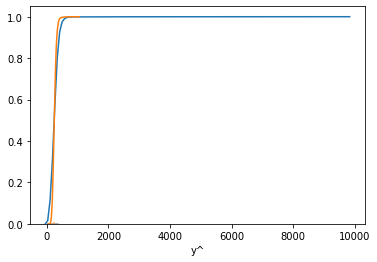

In [85]:
sns.distplot(valid.y,hist=True,kde_kws=dict(cumulative=True))
sns.distplot(valid['y^'],hist=True,kde_kws=dict(cumulative=True))

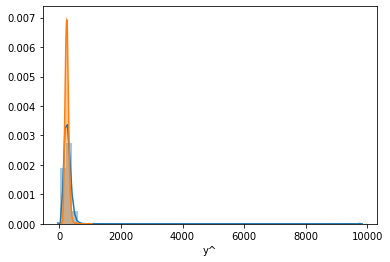

In [86]:
sns.distplot(valid.y,hist=True)
sns.distplot(valid['y^'],hist=True)

In [97]:
Xt = X.T

In [98]:
Xt.shape

(11, 101633)

In [102]:
np.dot(np.linalg.inv(np.dot(Xt,X)),np.dot(Xt,y))

array([ 0.08063615,  0.06889943, -0.09268276,  0.11369352, -0.1364401 ,
       -0.35087986,  0.61833255,  0.21882099, -0.14079576,  0.56659593,
        1.9657727 ])

In [104]:
modelo.coef_

array([ 0.09874579,  0.05125322, -0.06928371,  0.1845156 , -0.14940315,
       -0.3621428 ,  0.57148765,  0.2169438 , -0.30291524,  0.48849226,
       -2.98207058])